In [1]:
import scipy.io
import numpy as np
import os
from PIL import Image
import shutil
import matplotlib.pyplot as plt
import pandas as pd

# extract file
import tarfile

# build csv
import csv

import torch
from torch import nn, optim
from torchvision import datasets, transforms, models

# Use GPU or CPU for training
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/17/datasplits.mat

--2022-10-19 06:39:26--  https://www.robots.ox.ac.uk/~vgg/data/flowers/17/datasplits.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7487 (7.3K)
Saving to: ‘datasplits.mat’

datasplits.mat      100%[===================>]   7.31K  --.-KB/s    in 0s      

2022-10-19 06:39:28 (115 MB/s) - ‘datasplits.mat’ saved [7487/7487]



In [2]:
!wget https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz

--2022-10-20 02:11:11--  https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60270631 (57M) [application/x-gzip]
Saving to: ‘17flowers.tgz’

17flowers.tgz       100%[===================>]  57.48M  13.2MB/s    in 5.7s    

2022-10-20 02:11:18 (10.1 MB/s) - ‘17flowers.tgz’ saved [60270631/60270631]



In [3]:

file = tarfile.open("17flowers.tgz")
file.extractall("data_flowers/")

In [4]:
dir = "data_flowers/jpg/"
arr = os.listdir(dir)

# uncomment this if you just download a new flower17 dataset
# otherwise, you don't need to remove this file again
os.remove("data_flowers/jpg/files.txt") # this file is useless

In [ ]:
print(len(arr))
print(arr[0])

1361
image_0348.jpg


In [5]:
# build csv

with open('flowers.csv', mode = "w") as f:
  f.truncate()
with open('flowers.csv', mode='a', newline='') as f:
  csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  csv_writer.writerow(list(np.array(["img_id", "classes"])))

dir = "data_flowers/jpg/"
arr = os.listdir(dir)
arr.sort
n = 0
for img in arr:
  if img[:6] == "image_":
    img_id = img[:-4]
    id = img[6:-4]
    id.lstrip('0')
    id = int(id)
    if (id%80 != 0):
      label = (id//80)+1
    else:
      label = id//80
    row = list(np.array([img_id, label]))

    # Export to CSV
    with open('flowers.csv', mode='a', newline='') as f:
      csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
      csv_writer.writerow(row) 


In [6]:
# data frame
df = pd.read_csv("flowers.csv")

# attribute for our images
df = df[['img_id', 'classes']]

In [7]:
!mkdir data

In [8]:
%cd data

/content/data


In [9]:
# make folder for each class
!mkdir {f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17}

In [10]:
# separate images to each class folder
for i, (_, i_row) in enumerate(df.iterrows()):
  file_class = i_row['classes']
  file_name = i_row['img_id'] + ".jpg"
  file_path = "/content/data_flowers/jpg/" + i_row['img_id'] + ".jpg"
  shutil.copyfile(file_path, 'f' + str(file_class) + "/" + file_name)

In [11]:

img_list = os.listdir('f1')
print(os.listdir('f2'))
for i in range(2, 18):
  ls_dir = 'f'+str(i)
  ls = os.listdir(ls_dir)
  img_list.extend(os.listdir(ls_dir))
  print(len(ls))
print("Images: ", len(img_list))

['image_0115.jpg', 'image_0110.jpg', 'image_0096.jpg', 'image_0113.jpg', 'image_0084.jpg', 'image_0132.jpg', 'image_0127.jpg', 'image_0160.jpg', 'image_0122.jpg', 'image_0131.jpg', 'image_0140.jpg', 'image_0120.jpg', 'image_0111.jpg', 'image_0159.jpg', 'image_0108.jpg', 'image_0129.jpg', 'image_0100.jpg', 'image_0117.jpg', 'image_0104.jpg', 'image_0107.jpg', 'image_0125.jpg', 'image_0093.jpg', 'image_0083.jpg', 'image_0112.jpg', 'image_0086.jpg', 'image_0144.jpg', 'image_0085.jpg', 'image_0147.jpg', 'image_0134.jpg', 'image_0102.jpg', 'image_0150.jpg', 'image_0141.jpg', 'image_0101.jpg', 'image_0152.jpg', 'image_0130.jpg', 'image_0145.jpg', 'image_0121.jpg', 'image_0114.jpg', 'image_0142.jpg', 'image_0137.jpg', 'image_0118.jpg', 'image_0089.jpg', 'image_0155.jpg', 'image_0158.jpg', 'image_0153.jpg', 'image_0146.jpg', 'image_0133.jpg', 'image_0151.jpg', 'image_0099.jpg', 'image_0103.jpg', 'image_0105.jpg', 'image_0143.jpg', 'image_0082.jpg', 'image_0091.jpg', 'image_0098.jpg', 'image_00

In [12]:
%cd ..

/content


In [13]:
transform = transforms.Compose([
          transforms.Resize((64, 64)),
          transforms.ToTensor()
          ])

batch_size = 64
flower_data = datasets.ImageFolder('data', transform=transform)

In [14]:
print(flower_data.classes)
print(len(flower_data))

['f1', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
1360


In [15]:
# split dataset
# 80% training, 10% validating, 10% testing
trn_rate = 0.8
val_rate = 0.1
tst_rate = 0.1

#[dataset, [len1, len2, len3]]
train_set, valid_set, test_set = torch.utils.data.random_split(flower_data, [int(len(img_list) * trn_rate), int(len(img_list) * val_rate), int(len(img_list) * tst_rate)])
train_data_size = len(train_set)
valid_data_size = len(valid_set)
test_data_size = len(test_set)

In [16]:
print(train_data_size,valid_data_size,test_data_size)

1088 136 136


In [17]:
# add dataloader
trainLoader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)
validLoader = torch.utils.data.DataLoader(valid_set,batch_size=batch_size, shuffle=True)
testLoader  = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [18]:
# AlexNet model
class AlexNet(nn.Module):
    
    def __init__(self, num_classes: int = 17):
        super(AlexNet, self).__init__()

        self.convolutional = nn.Sequential(
            # first layer
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            # activation function
            nn.ReLU(inplace=True),
            # pooling
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        # average pooling layer
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.linear = nn.Sequential(
            nn.Dropout(),
            # fully connected layer
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),

            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),

            nn.Linear(4096, 17) # 2 classes
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:

        x = self.convolutional(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.linear(x)
        return torch.softmax(x, 1)

In [19]:
model = AlexNet()
if torch.cuda.is_available():
  model.cuda()

In [21]:
# need to use adam
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

In [22]:
def accuracy(pred, label, idx):
  #print(flower_data.classes[torch.max(pred[i], 0)[1]])
  if flower_data.classes[torch.max(pred[idx], 0)[1]] == flower_data.classes[label[idx]]:
    return 1
  else:
    return 0


In [23]:
with open('training.csv', mode = "w") as f:
  f.truncate()
with open('training.csv', mode='a', newline='') as f:
  csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  csv_writer.writerow(list(np.array(["epoch", "accuracy"])))

In [24]:
epochs = 100
training_loss = []
validation_loss = []
train_accu = []
valid_accu = []
min_valid_loss = np.inf

for epoch in range(epochs):
   
    total_train_loss = 0
    n_correct = 0
    n_wrong = 0
    
    # training our model
    for idx, (image, label) in enumerate(trainLoader):
      image, label = image.to(device), label.to(device)

      optimizer.zero_grad()
      pred = model(image)

      # get training loss
      loss = criterion(pred, label)
      total_train_loss += loss.item()

      
      # print(idx, flower_data.classes[torch.max(pred[idx], 0)[1]], flower_data.classes[label[idx]])


      # get training accuracy
      if accuracy(pred, label, idx):
        n_correct += 1
      else:
        n_wrong += 1

      loss.backward()
      optimizer.step()

    acc = n_correct/(n_correct + n_wrong)
    row = [epoch+1, acc]
    with open('training.csv', mode='a', newline='') as f:
      csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
      csv_writer.writerow(row) 

    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for idx, (image, label) in enumerate(validLoader):
      image, label = image.to(device), label.to(device)
        
      target = model(image)
      loss = criterion(target, label)
      valid_loss = loss.item() * image.size(0)

    print(f'Epoch {epoch+1} \t\t Training Loss: {total_train_loss / len(trainLoader)} \t\t Validation Loss: {valid_loss / len(validLoader)} \t\t Accuracy: {acc}')



    if min_valid_loss > valid_loss:
      print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
      min_valid_loss = valid_loss

      # Saving State Dict
      torch.save(model.state_dict(), 'saved_model.pth')



    # total_train_loss = total_train_loss / (idx + 1)
    # train_loss.append(total_train_loss)

    # print(f'Epoch: {epoch} | Train Loss: {total_train_loss}')

Epoch 1 		 Training Loss: 2.833122926599839 		 Validation Loss: 7.559403737386067 		 Accuracy: 0.058823529411764705
Validation Loss Decreased(inf--->22.678211) 	 Saving The Model
Epoch 2 		 Training Loss: 2.8159541803247787 		 Validation Loss: 7.552221298217773 		 Accuracy: 0.058823529411764705
Validation Loss Decreased(22.678211--->22.656664) 	 Saving The Model
Epoch 3 		 Training Loss: 2.8143951051375447 		 Validation Loss: 7.31752077738444 		 Accuracy: 0.058823529411764705
Validation Loss Decreased(22.656664--->21.952562) 	 Saving The Model
Epoch 4 		 Training Loss: 2.797591980765848 		 Validation Loss: 7.5832773844401045 		 Accuracy: 0.0
Epoch 5 		 Training Loss: 2.7804792768814983 		 Validation Loss: 7.401064554850261 		 Accuracy: 0.17647058823529413
Epoch 6 		 Training Loss: 2.772289346246158 		 Validation Loss: 7.554704666137695 		 Accuracy: 0.17647058823529413
Epoch 7 		 Training Loss: 2.7660794538610123 		 Validation Loss: 7.573799769083659 		 Accuracy: 0.058823529411764705
Ep

In [25]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('training.csv')

fig = px.line(df, x = 'epoch', y = 'accuracy', title='Training Accuracy VS Num of Epoch')
fig.show()

In [45]:
with open('testing.csv', mode = "w") as f:
  f.truncate()
with open('testing.csv', mode='a', newline='') as f:
  csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
  csv_writer.writerow(list(np.array(["class", "accuracy"])))

In [48]:
# old test
testiter = iter(testLoader)
images, labels = testiter.next()

with torch.no_grad():
  images = images.to(device) 
  labels = labels.to(device)
  testloss = 0
  pred = model(images)

print(pred.shape)

images_np = [i.cpu() for i in images]
class_names = flower_data.classes
print(class_names)



torch.Size([64, 17])
['f1', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']


In [46]:
# new test
num_correct = 0
num_samples = 0
with torch.no_grad():
  for idx, (image, label) in enumerate(testLoader):
    image = images.to(device) 
    label = labels.to(device)
    
    testloss = 0
    pred = model(images)

    # scores = model(x)
    _, predictions = pred.max(1)
    num_correct += (predictions == label).sum()
    num_samples += predictions.size(0)

  test_acc = num_correct/num_samples
  row = [class_names[label[idx]], test_acc]
  with open('testing.csv', mode='a', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(row)


In [49]:
test_correct = 0
test_wrong = 0
for i in range(pred.shape[0]):
  if class_names[labels[i]] == class_names[torch.max(pred[i], 0)[1]]:
    test_correct += 1
  else:
    test_wrong += 1
  test_acc = test_correct/(test_correct+test_wrong)
  row = [i, test_acc]
  with open('testing.csv', mode='a', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(row)


In [47]:
df = pd.read_csv('testing.csv')

fig = px.line(df, x = 'class', y = 'accuracy', title='Testing Accuracy VS Num of Epoch')
fig.show()

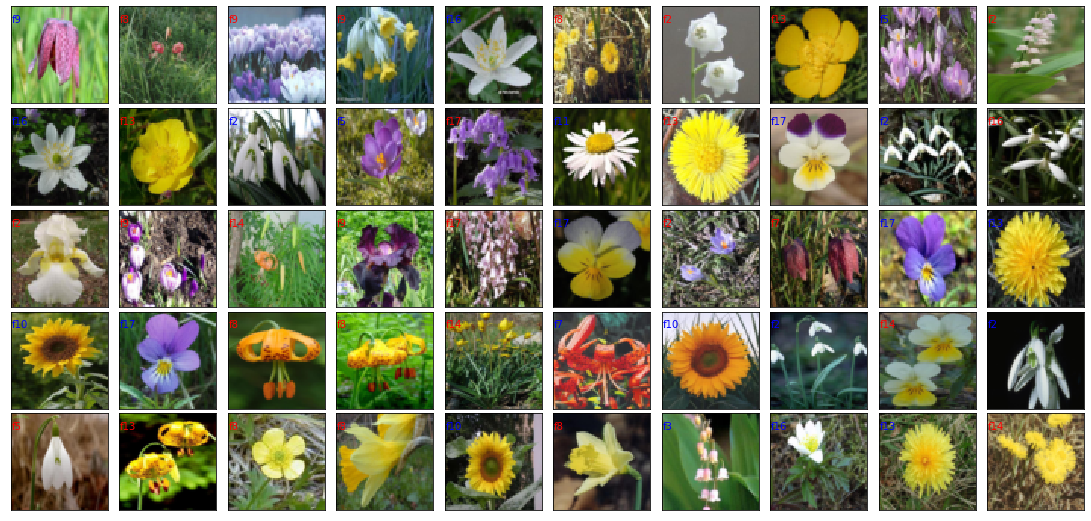

In [52]:
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(50):
    ax = fig.add_subplot(5, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(images_np[i].permute(1, 2, 0), cmap=plt.cm.gray_r, interpolation='nearest')
    if class_names[labels[i]] == class_names[torch.max(pred[i], 0)[1]]:
      ax.text(0, 10, class_names[torch.max(pred[i], 0)[1]], color='blue')
    else:
      ax.text(0, 10, class_names[torch.max(pred[i], 0)[1]], color='red')